## Grupo
Nomes: Camila Moraes Brito, Gabriel de Freitas Garcia  
Ra: , 216179

In [69]:
import math
import numpy as np
import json
import random
import matplotlib.pyplot as plt
import copy
from sklearn import decomposition

In [39]:
density = 5
density2 = 15
density3 = 20
epsilon = 0.01
epsilon2 = 0.005
epsilon3 = 0.02

In [3]:
def getDataset(dataset):
    cleanDataset = {
        "matrix" : [],
        "cluster": [],
    }
    for i in range(len(dataset)):
        point = getPoint(dataset[i],i)
        cleanDataset["matrix"].append(point)
        cleanDataset["cluster"].append(dataset[i]["cluster"])
    return cleanDataset

In [4]:
def getPoint(oPoint,t):
    point = {
        "coord" : [],
        "neigh" : [],
        "cluster" : -2,
        "pos" : t
    }
    for i in oPoint:
        if i != "cluster":
            point["coord"].append(oPoint[i])
    point["coord"] = np.array(point["coord"])
    return point

In [5]:
def normalize(matrix):
    lists = []
    for i in range(len(matrix[0]["coord"])):
        lists.append(np.array(getList(matrix,i)))
    for i in range(len(lists)):
        norm = np.linalg.norm(lists[i])
        lists[i] = lists[i]/norm
    for i in range(len(lists[0])):
        for j in range(len(lists)):
            matrix[i]["coord"][j] = lists[j][i]
    return matrix

In [6]:
def getList(matrix,t):
    #print(matrix[0])
    array = []
    for i in matrix:
        array.append(i["coord"][t])
    return array

In [7]:
def getDistance(point1,point2):
    distance = np.linalg.norm(point1 - point2)
    return distance

In [8]:
def dbscan(dataset,den,ep):
        corePoints = getNeighs(dataset["matrix"],ep,den)
        #dfs(dataset["matrix"],dataset["cluster"],den)
        getCluster(dataset["matrix"],dataset["cluster"],corePoints)

In [9]:
def getNeighs(dataset,ep,den):
    corePoints = []
    for i in range(len(dataset)):
        for j in range(i+1,len(dataset)):
            if getDistance(dataset[i]["coord"],dataset[j]["coord"]) < ep:
                dataset[i]["neigh"].append(j)
                dataset[j]["neigh"].append(i)
        if (len(dataset[i]["neigh"]) + 1) >= den:
            corePoints.append(i)
    return corePoints

In [10]:
def getCluster(matrix,clusters,corePoints):
    sumCluster = -1
    for i in corePoints:
        if matrix[i]["cluster"] == -2:
            sumCluster += 1
            matrix[i]["cluster"] = sumCluster
        clusters[i] = matrix[i]["cluster"]
        for j in matrix[i]["neigh"]:
            if matrix[j]["cluster"] > -2:
                continue
            matrix[j]["cluster"] = matrix[i]["cluster"]
            clusters[j] = matrix[i]["cluster"]
            

In [11]:
def dfs(matrix,clusters,den):
    sumCluster = -1
    for i in range(len(matrix)):
        if matrix[i]["cluster"] != -2:
            continue
        countNeigh = len(matrix[i]["neigh"])
        if countNeigh < den:
            matrix[i]["cluster"] = -1
            continue
        sumCluster += 1
        clusters[i] = sumCluster
        matrix[i]["cluster"] = sumCluster
        dfsColor(matrix,i,clusters)

In [12]:
def dfsColor(matrix,i,clusters):
    for j in matrix[i]["neigh"]:
        if matrix[j]["cluster"] > -1:
            continue
        else:
            matrix[j]["cluster"] = matrix[i]["cluster"]
            clusters[j] = matrix[i]["cluster"]
            dfsColor(matrix,j,clusters)

In [13]:
def cleanOutliers(dataset):
    clean = []
    for i in range(len(dataset["cluster"])):
        if(dataset["cluster"][i] <= -1):
            clean.append(i)
    for i in range(len(clean)):
        del dataset["cluster"][clean[i]-i]
        del dataset["matrix"][clean[i]-i]

In [15]:
def print2d(dataset,path):
    #print(getList(dataset["matrix"],0))
    #print(getList(dataset["matrix"],1))
    plt.scatter(getList(dataset["matrix"],0),getList(dataset["matrix"],1),c = dataset["cluster"])
    plt.title("clusteredData")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.savefig(path)

In [16]:
def printCount(dataset,path):
    clusterCount = []
    manyCluster = getManyCluster(dataset["cluster"])
    for i in manyCluster:
        clusterCount.append(getClusterCount(dataset["matrix"],i))
    print(manyCluster)
    print(clusterCount)
    plt.bar(manyCluster,clusterCount)
    plt.title("Clusters length")
    plt.xlabel("Cluster")
    plt.ylabel("Number of elements in cluster")
    plt.grid(True)
    plt.savefig(path)

In [17]:
def getClusterCount(matrix,k):
    summ = 0
    for i in matrix:
        if i["cluster"] == k:
            summ += 1
    return summ

In [18]:
def getManyCluster(clusters):
    many = []
    for i in clusters:
        if len(many) == 0:
            many.append(i)
            continue
        tam = len(many) - 1
        k = binarySearch(i,many,0,tam)
        if many[k] == i:
            continue
        if many[k] > i:
            many.insert(k,i)
        if many[k] < i:
            if k == tam:
                many.append(i)
            else:
                many.insert(k+1,i)
    return many

In [19]:
def binarySearch(element,array,ini,end):
    if ini >= end:
        return ini
    mid = math.floor((ini+end)/2)
    if array[mid] == element:
        return mid
    elif array[mid] < element:
        return binarySearch(element,array,mid+1,end)
    else:
        return binarySearch(element,array,ini,mid)

In [20]:
def printDbScan(dataset,den,ep,printable,path):
    dbscan(dataset,den,ep)
    cleanOutliers(dataset)
    printable(dataset,path)

In [21]:
def getPoints(matrix):
    points = []
    for i in matrix:
        points.append(i["coord"])
    return np.array(points)

In [22]:
def restore(points,dataset):
    newDataset = copy.deepcopy(dataset)
    for i in range(len(newDataset["matrix"])):
        newDataset["matrix"][i]["coord"] = points[i]
    return newDataset

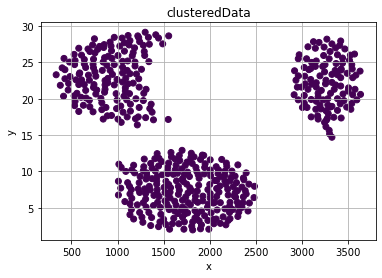

In [23]:
exist = True
try:
    f = open("../data/teacherData.json","r")
    stringSet = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset = json.loads(stringSet)
    nDataset = getDataset(dataset)
    print2d(nDataset,"../images/originalData1.jpg")
    #plt.scatter(getList(nDataset["matrix"],0),getList(nDataset["matrix"],1))
    #plt.title("Original Data")
    #plt.xlabel("x")
    #plt.ylabel("y")
    #plt.grid(True)
    #plt.savefig("../images/originalData1.png")
    nDataset["matrix"] = normalize(nDataset["matrix"])
    #for i in nDataset["matrix"]:
       # print(i["coord"])

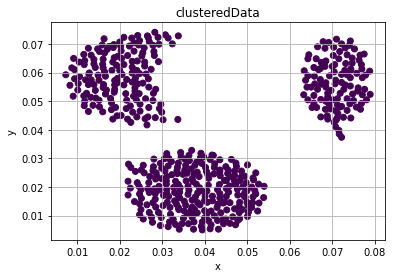

In [24]:
print2d(nDataset,"../images/test.jpg")

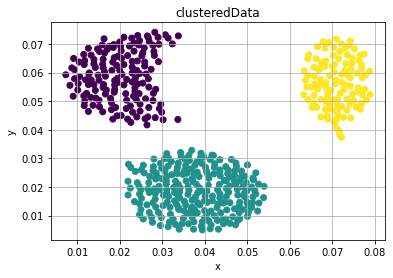

In [25]:
printDbScan(nDataset,density,epsilon,print2d,"../images/dbscanClustered1.jpg")
#print(nDataset["matrix"])
#for i in nDataset["matrix"]:
    #print(i["coord"])

In [53]:
exist = True
try:
    f = open("../data/strokeData.json","r")
    stringSet2 = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset2 = json.loads(stringSet2)
    nDataset2 = getDataset(dataset2)
    nDataset2["matrix"] = normalize(nDataset2["matrix"])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[26, 37, 40, 18, 395, 65, 619, 1125, 125, 813, 64, 135, 57, 311, 54, 98, 25, 35, 80, 64, 51, 74, 71, 1, 5, 2, 14, 14, 3]


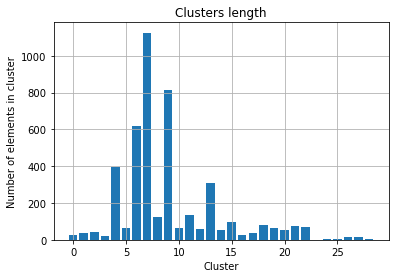

In [52]:
printDbScan(nDataset2,density3,epsilon3,printCount,"../images/dbscanCount2_new.jpg")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[395, 644, 1125, 126, 813, 134, 311, 98, 25, 58, 74, 102, 51, 150, 1, 45]


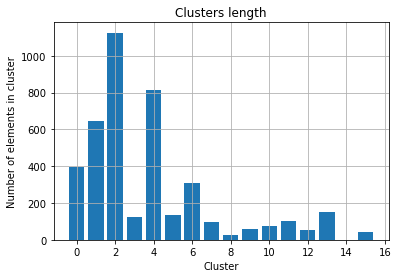

In [50]:
printDbScan(nDataset2,60,epsilon3,printCount,"../images/dbscanCount2_60_002.jpg")

In [67]:
results1 = []
for i in range(10,101,10):
        tDataset = copy.deepcopy(nDataset2)
        dbscan(tDataset,i,epsilon3)
        cleanOutliers(tDataset)
        results1.append(tDataset)

[0, 1, 2, 3, 4, 5]
[192, 43, 3838, 365, 174, 27]


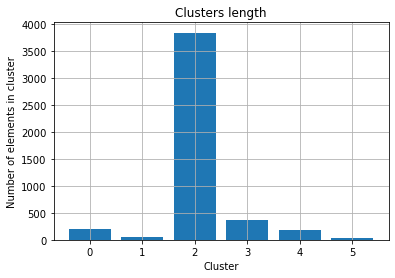

In [70]:
printCount(results0[0],"../images/dbscanCount2_10_005.jpg")

[0, 1, 2, 3, 4, 5]
[192, 39, 3838, 365, 174, 27]


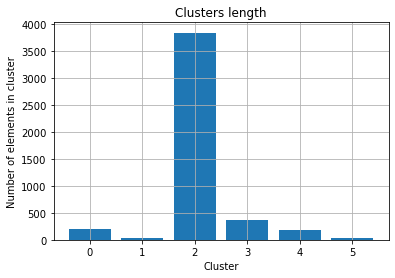

In [71]:
printCount(results0[1],"../images/dbscanCount2_20_005.jpg")

[0, 1, 2, 3, 4, 5]
[192, 39, 3838, 365, 174, 27]


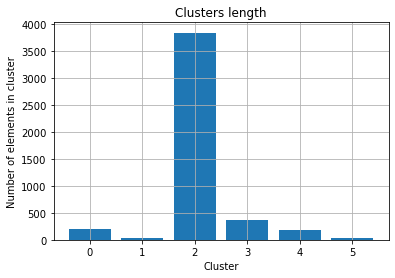

In [72]:
printCount(results0[2],"../images/dbscanCount2_30_005.jpg")

[0, 1, 2, 3, 4]
[192, 3838, 365, 174, 27]


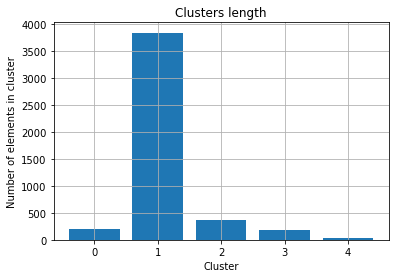

In [73]:
printCount(results0[3],"../images/dbscanCount2_40_005.jpg")

[0, 1, 2, 3, 4]
[192, 3838, 365, 174, 27]


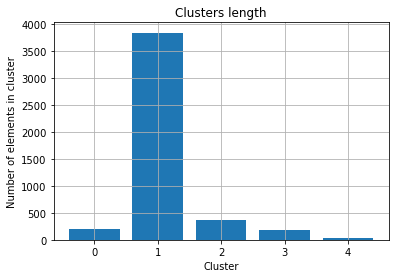

In [74]:
printCount(results0[4],"../images/dbscanCount2_50_005.jpg")

[0, 1, 2, 3, 4]
[192, 3838, 365, 174, 27]


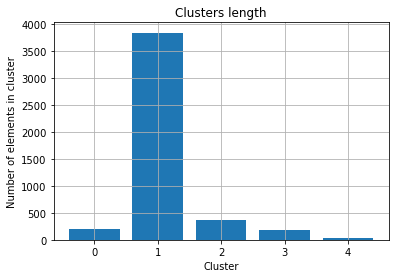

In [75]:
printCount(results0[5],"../images/dbscanCount2_60_005.jpg")

[0, 1, 2, 3]
[192, 3838, 365, 201]


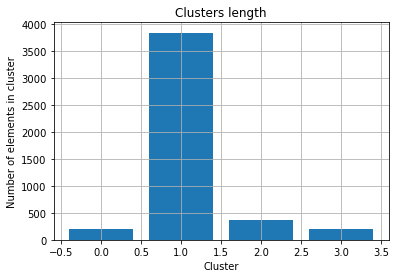

In [76]:
printCount(results0[6],"../images/dbscanCount2_70_005.jpg")

[0, 1, 2, 3]
[191, 3838, 365, 200]


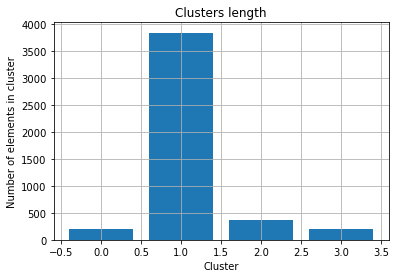

In [77]:
printCount(results0[7],"../images/dbscanCount2_80_005.jpg")

[0, 1, 2, 3]
[191, 3838, 365, 200]


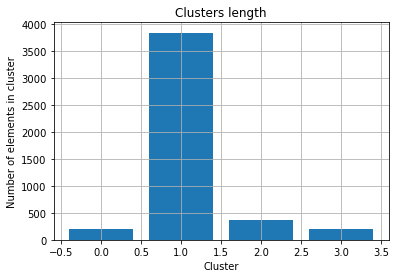

In [78]:
printCount(results0[8],"../images/dbscanCount2_90_005.jpg")

[0, 1, 2, 3]
[191, 3838, 365, 200]


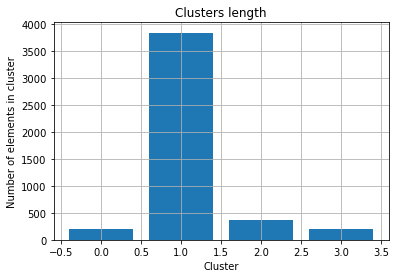

In [79]:
printCount(results0[9],"../images/dbscanCount2_100_005.jpg")

In [68]:
results0 = []
for i in range(10,101,10):
        tDataset = copy.deepcopy(nDataset2)
        dbscan(tDataset,i,0.05)
        cleanOutliers(tDataset)
        results0.append(tDataset)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
[15, 23, 26, 20, 8, 15, 38, 12, 2, 2, 395, 65, 619, 1124, 125, 813, 31, 64, 135, 47, 311, 4, 52, 13, 98, 25, 23, 80, 34, 51, 74, 18, 67, 1, 5, 2, 22, 14, 5, 1, 3, 11, 13]


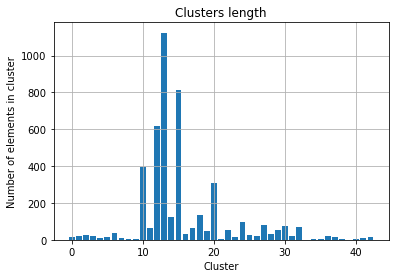

In [103]:
printCount(results1[0],"../images/dbscanCount2_10_002.jpg")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[26, 37, 40, 18, 395, 65, 619, 1125, 125, 813, 64, 135, 57, 311, 54, 98, 25, 35, 80, 64, 51, 74, 71, 1, 5, 2, 14, 14, 3]


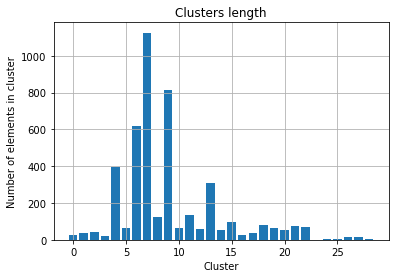

In [91]:
printCount(results1[1],"../images/dbscanCount2_20_002.jpg")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[32, 55, 395, 76, 619, 1125, 125, 813, 72, 135, 67, 311, 57, 98, 25, 80, 51, 74, 75, 1, 2, 28, 3, 39]


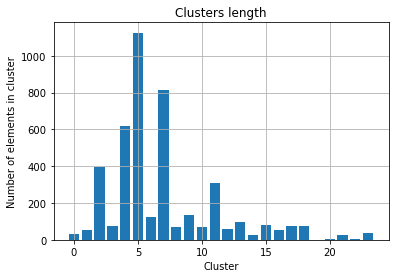

In [92]:
printCount(results1[2],"../images/dbscanCount2_30_002.jpg")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[395, 76, 619, 1125, 125, 813, 135, 311, 56, 98, 25, 80, 51, 74, 73, 96, 1, 3, 57]


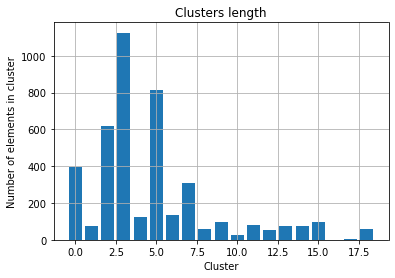

In [93]:
printCount(results1[3],"../images/dbscanCount2_40_002.jpg")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[395, 76, 644, 1125, 126, 813, 134, 311, 98, 25, 58, 74, 72, 51, 152, 1]


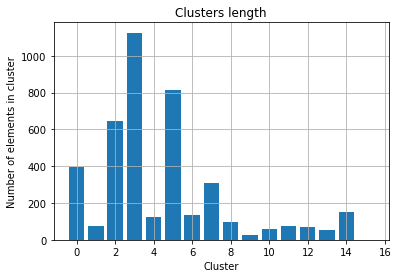

In [94]:
printCount(results1[4],"../images/dbscanCount2_50_002.jpg")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[395, 644, 1125, 126, 813, 134, 311, 98, 25, 58, 74, 102, 51, 150, 1, 45]


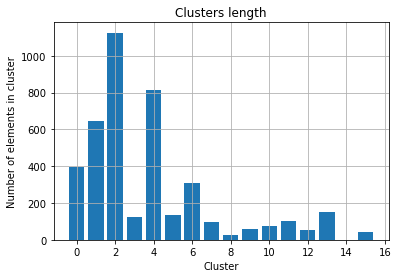

In [95]:
printCount(results1[5],"../images/dbscanCount2_60_002.jpg")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[395, 644, 1125, 126, 813, 134, 311, 98, 25, 58, 74, 51, 1, 125, 130]


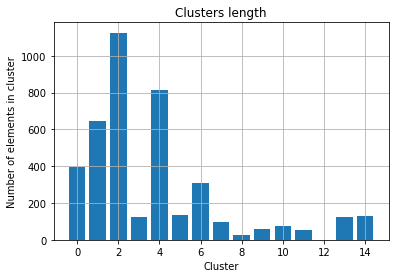

In [96]:
printCount(results1[6],"../images/dbscanCount2_70_002.jpg")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[395, 644, 1125, 126, 813, 134, 311, 98, 25, 58, 74, 51, 1, 117, 95]


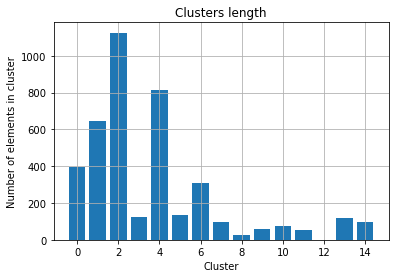

In [100]:
printCount(results1[7],"../images/dbscanCount2_80_002.jpg")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[395, 644, 1125, 126, 813, 134, 315, 98, 25, 56, 70, 52, 1, 96]


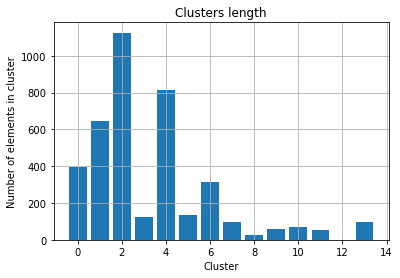

In [101]:
printCount(results1[8],"../images/dbscanCount2_90_002.jpg")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[395, 689, 1125, 125, 814, 135, 383, 97, 25, 62, 1]


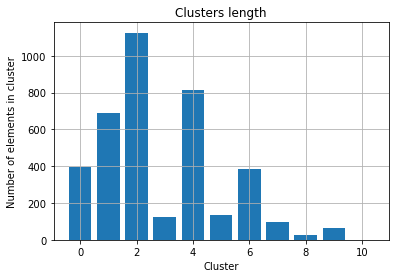

In [102]:
printCount(results1[9],"../images/dbscanCount2_100_002.jpg")

[0, 1, 2, 3, 4, 5]
[192, 39, 3838, 365, 174, 27]


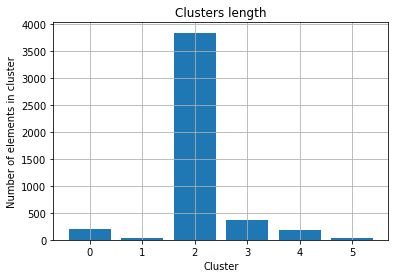

In [85]:
printDbScan(nDataset2,density3,0.05,printCount,"../images/dbscanCount2_new1.jpg")

In [36]:
points = getPoints(nDataset2["matrix"])
print(points[0])
pca = decomposition.PCA(n_components=2)
pca.fit(points)
pcPoints = pca.transform(points)
print(pcPoints[0])

[ 0.00706648  0.0184303   0.          0.          0.          0.01169951
  0.          0.02575819  0.          0.06523281 -0.00050177]
[0.02438525 0.03351002]


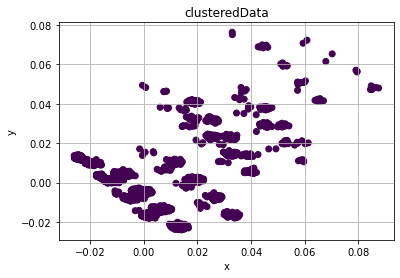

In [56]:
pcaDataset = restore(pcPoints,nDataset2)
print2d(pcaDataset,"../images/pcaDatasetD.jpg")

In [50]:
print(pcaDataset["matrix"][0])

{'coord': array([0.02438525, 0.03351002]), 'neigh': [19, 22, 36, 38, 45, 51, 53, 63, 70, 71, 75, 88, 91, 92, 95, 97, 104, 105, 109, 115, 121, 131, 145, 159, 165, 187, 190, 191, 194, 198, 200, 201, 202, 204, 209, 214, 215, 218, 220, 734, 1298, 2206, 3747, 3936], 'cluster': 0, 'pos': 0}


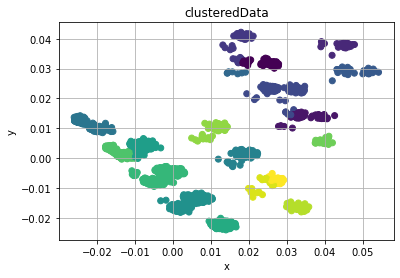

In [49]:
printDbScan(pcaDataset,density2,epsilon2,print2d,"../images/dbscanPCA1_0005_20.jpg")

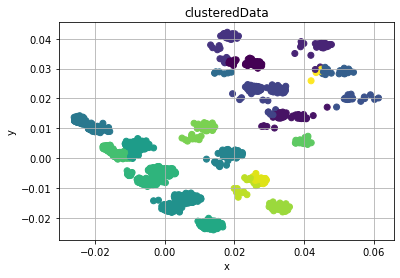

In [53]:
printDbScan(pcaDataset,density2,epsilon2,print2d,"../images/dbscanPCA1_0005_15.jpg")

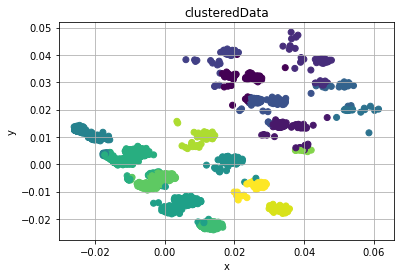

In [57]:
printDbScan(pcaDataset,18,0.008,print2d,"../images/dbscanPCA1_0008_18.jpg")

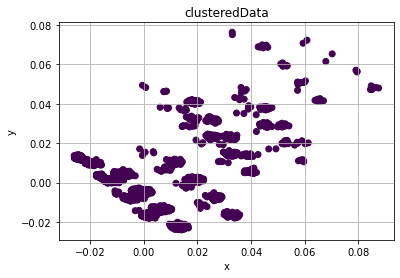

In [44]:
printDbScan(pcaDataset,density2,0.05,print2d,"../images/dbscanPCA2.jpg")